Initializing.

In [1]:
%load_ext autoreload
from analysis_CV import *
import tkinter as tk
from tkinter import filedialog 
from tkinter import messagebox
import os

root = tk.Tk()
root.withdraw()
root.lift()
root.attributes("-topmost", True)

''

Choose folder with the data files to be analyzed.

In [2]:
path = filedialog.askdirectory()
#root.mainloop()

# Check whether measurement is complete: (cf. https://www.devdungeon.com/content/dialog-boxes-python#toc-3
if len(os.listdir(path)) < 212:
    messagebox.showwarning("RDE Analysis", "Warning: Folder does not contain enough files")
    sys.exit()
print("Path:", path)

Path: C:/Users/go29guw/Documents/Data analysis/RDE_analysis/ML01


Open the file with the interesting voltage and current data.

In [3]:
%autoreload
file = filedialog.askopenfilename()
V, I = get_voltage_current(file)

Introduce background and parameters: choose the corresponding files.

In [4]:
%autoreload
background_file = filedialog.askopenfilename()
background_matrix = get_background(background_file)

In [5]:
parameters_file = filedialog.askopenfilename()
parameters_dictionary = get_parameters(parameters_file)

Corrections:
* Voltage to RHE potential.
* iR-drop correction
* Background adjustment of current

In [6]:
%autoreload
voltage_RHE, background_RHE = RHE_correction(V, background_matrix, parameters_dictionary)
new_V = ir_drop_correction(voltage_RHE, background_RHE, 1, parameters_dictionary)
new_I = background_correction_current(I, background_RHE, 1)

Normalizing to geometric surface area and mass.

In [7]:
%autoreload
mass_I = copy.deepcopy(new_I)
surface_I = copy.deepcopy(new_I)

mass_I, surface_I = normalizing(new_I, parameters_dictionary)

Text(0.5, 1.0, 'Current vs voltage for normalized values')

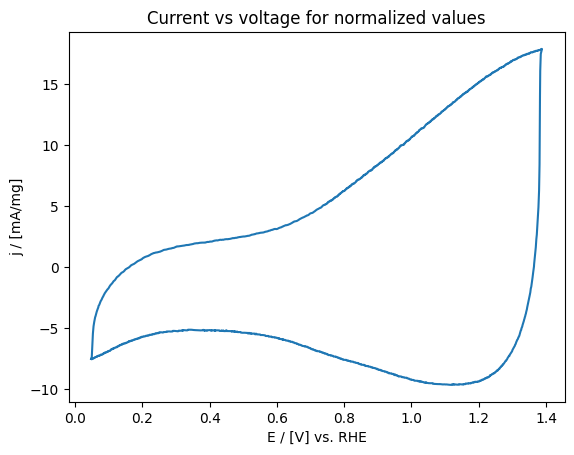

In [8]:
plt.plot(new_V, mass_I)
plt.xlabel('E / [V] vs. RHE')
plt.ylabel('j / [mA/mg]')
plt.title('Current vs voltage for normalized values')